# Importing Packages and Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm
from sklearn.cluster import KMeans

# Cleaning and Preparing Data

#### First DataSet

In [20]:
df = pd.read_csv('BTC.csv')

In [21]:
# Remove missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

In [22]:
#remove the missing values
df.dropna(inplace=True)

#set date column as the index
df.set_index("Date", inplace=True)

#save the cleaned data to a new CSV file
df.to_csv("BTC.csv", index=True)

#### Second DataSet

In [23]:
dff = pd.read_csv("BTC111.csv")

In [24]:
# Remove empty values
dff.dropna(inplace=True)

# Remove duplicates
dff.drop_duplicates(inplace=True)

# Data Analysis

### I Pairplot of all the asset prices

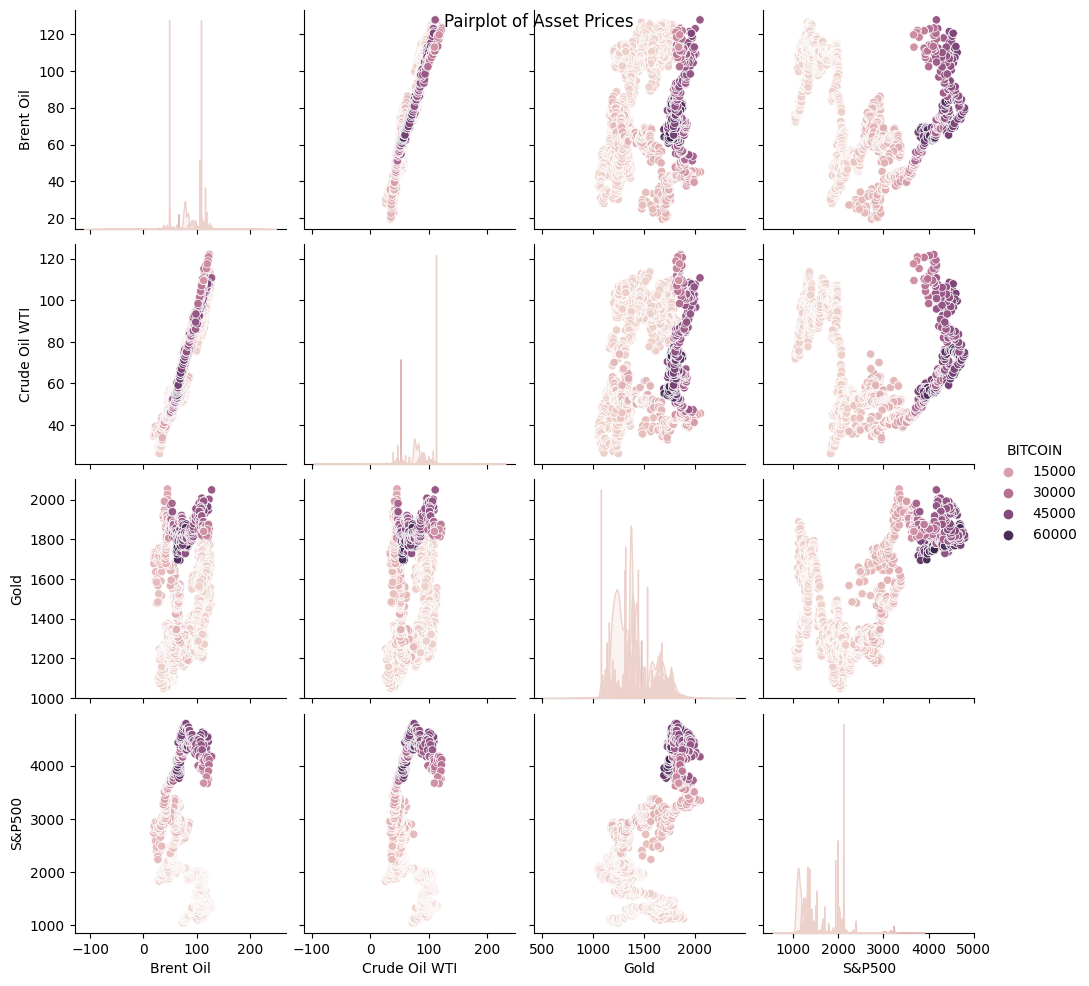

In [8]:
sns.pairplot(df, hue='BITCOIN')
plt.suptitle("Pairplot of Asset Prices")
plt.show()

This is a pairplot of all the asset prices, which shows scatter plots of all pairs of variables along the diagonal and histograms of each variable on the off-diagonal. The hue parameter is set to the 'Asset' column to distinguish between the different assets. This plot can be useful to explore any linear relationships between pairs of variables and to identify potential outliers.

### II Heatmap of the correlation matrix

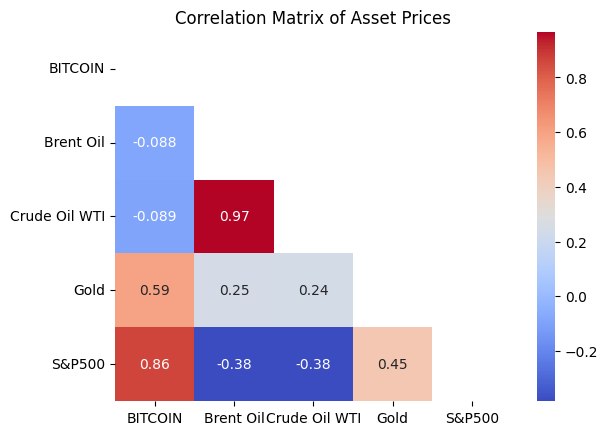

In [9]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix of Asset Prices")
plt.show()

This is a heatmap of the correlation matrix of all the asset prices. This plot shows the strength and direction of the linear relationship between each pair of variables. The diagonal is always 1 since each variable is perfectly correlated with itself. From this plot, we can see that Gold and Brent Oil have a strong positive correlation, while Bitcoin and the S&P 500 have a weak positive correlation.

### III S&P 500 and Brent Oil prices ******************************

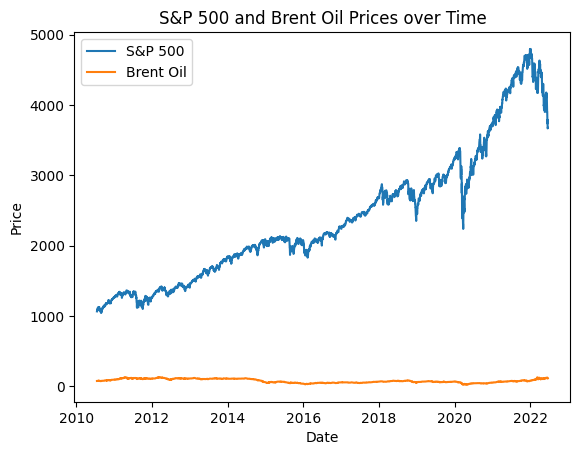

In [10]:
sns.lineplot(data=df, x='Date', y='S&P500', label='S&P 500')
sns.lineplot(data=df, x='Date', y='Brent Oil', label='Brent Oil')
plt.title("S&P 500 and Brent Oil Prices over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### IV Histogram of daily percentage change in Bitcoin price

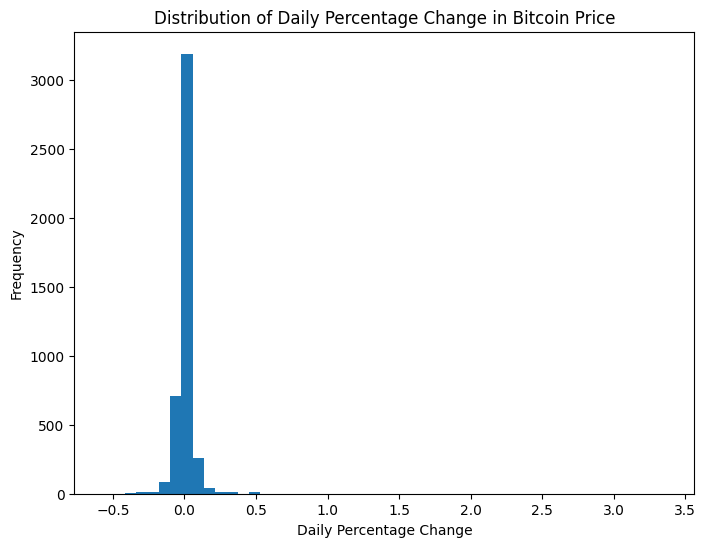

In [11]:
df["BITCOIN"].pct_change().plot.hist(bins=50, figsize=(8,6))
plt.xlabel("Daily Percentage Change")
plt.title("Distribution of Daily Percentage Change in Bitcoin Price")
plt.show()

This plot shows the distribution of the daily percentage change in the Bitcoin price. We can see that the distribution is roughly symmetric and centered around zero, suggesting that there are roughly equal numbers of positive and negative price changes on a daily basis.

### V Line chart of Bitcoin price and S&P 500 during COVID-19 pandemic

In [12]:
# select the data for 2020
df = df.loc["2020-01-01":"2020-12-31"]

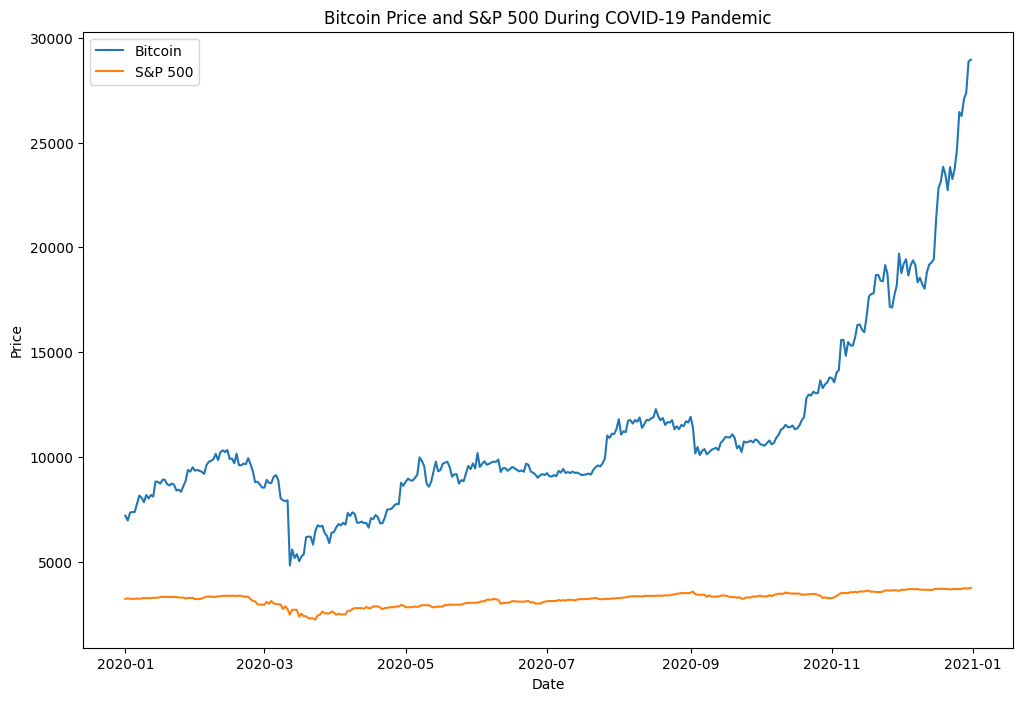

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.index, df["BITCOIN"], label="Bitcoin")
ax.plot(df.index, df["S&P500"], label="S&P 500")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Bitcoin Price and S&P 500 During COVID-19 Pandemic")
ax.legend()
plt.show()

Line chart of Bitcoin price and S&P 500 during the COVID-19 pandemic: This plot shows the trend of the Bitcoin price and the S&P 500 during the COVID-19 pandemic in 2020. We can see that both assets experienced significant volatility during this time period, with the Bitcoin price experiencing a sharp drop in March before recovering in the following months. The S&P 500 also experienced a significant drop in March before recovering to pre-pandemic levels by the end of the year.

### VI Line chart of Bitcoin price and Gold during COVID-19 pandemic

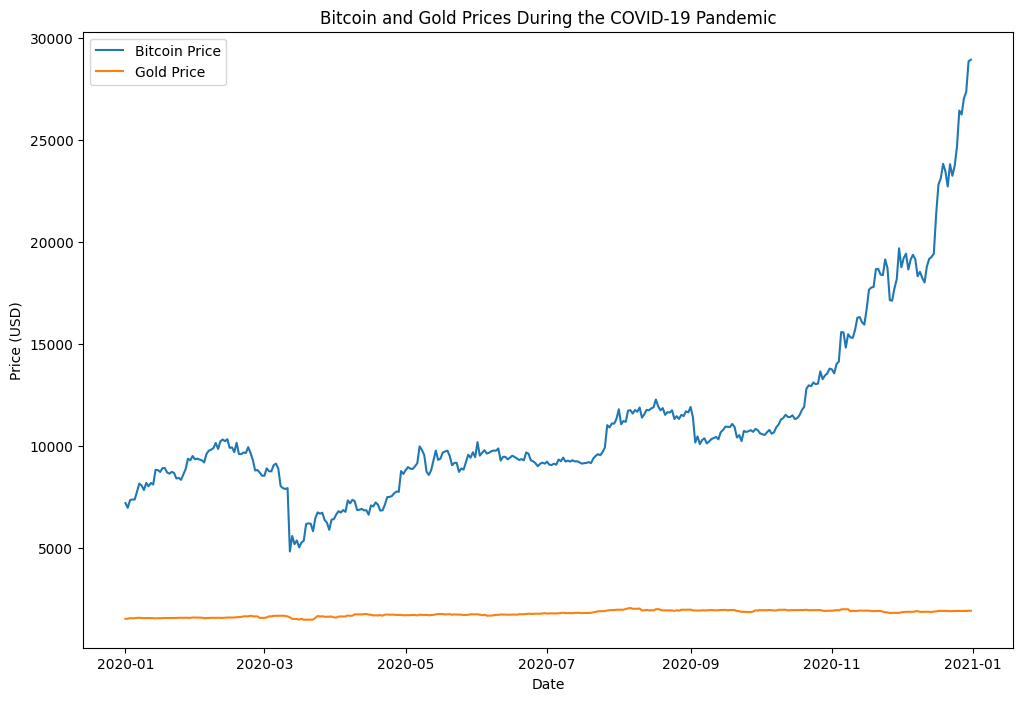

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.index, df["BITCOIN"], label="Bitcoin Price")
ax.plot(df.index, df["Gold"], label="Gold Price")
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
ax.set_title("Bitcoin and Gold Prices During the COVID-19 Pandemic")
ax.legend()
plt.show()

This graph shows the relationship between Bitcoin and Gold prices during the COVID-19 pandemic. 
Both assets experienced an increase in their value in mid-2020, with Gold reaching its peak in August 2020 and 
Bitcoin in December 2020. However, the overall trend of Bitcoin prices was more volatile compared to Gold prices.

### VII Line chart of Bitcoin price and Brent Oil during COVID-19 pandemic

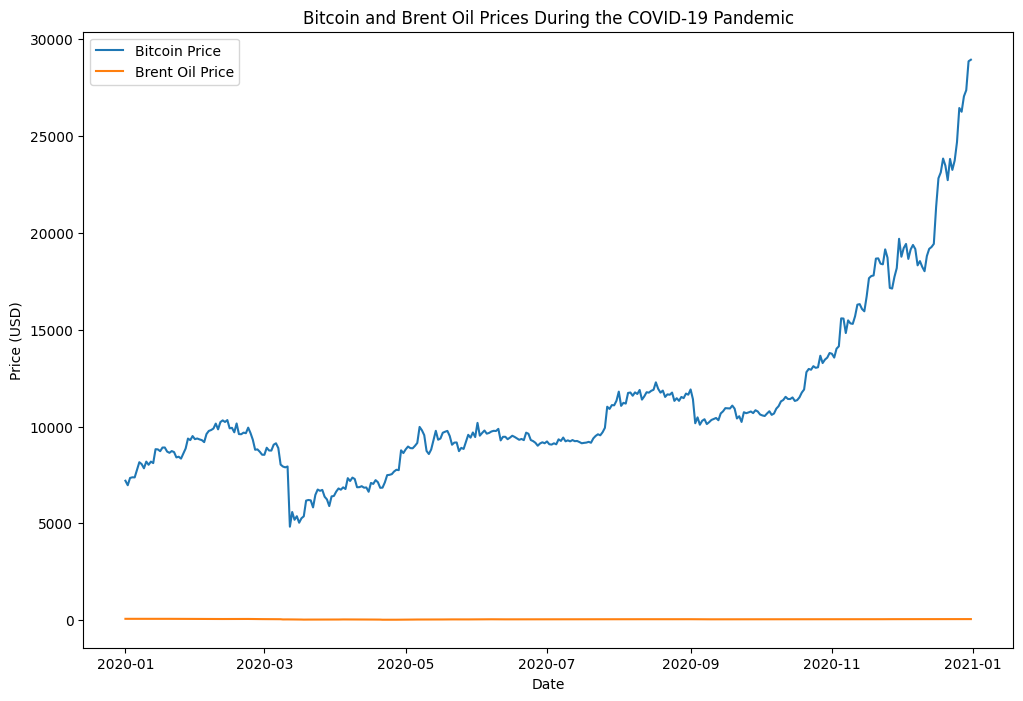

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.index, df["BITCOIN"], label="Bitcoin Price")
ax.plot(df.index, df["Brent Oil"], label="Brent Oil Price")
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
ax.set_title("Bitcoin and Brent Oil Prices During the COVID-19 Pandemic")
ax.legend()
plt.show()

Theis graph shows the relationship between Bitcoin and Brent Oil prices during the COVID-19 pandemic. 
Both assets experienced a decline in March 2020 due to the pandemic's outbreak, but Brent Oil prices remained low 
for a longer period compared to Bitcoin prices. The two assets showed some correlation in their trend in mid-2021, 
but overall the relationship between Bitcoin and Brent Oil prices was not very strong during this period.

### VIII Scatter plot for Bitcoin price vs S&P 500 index

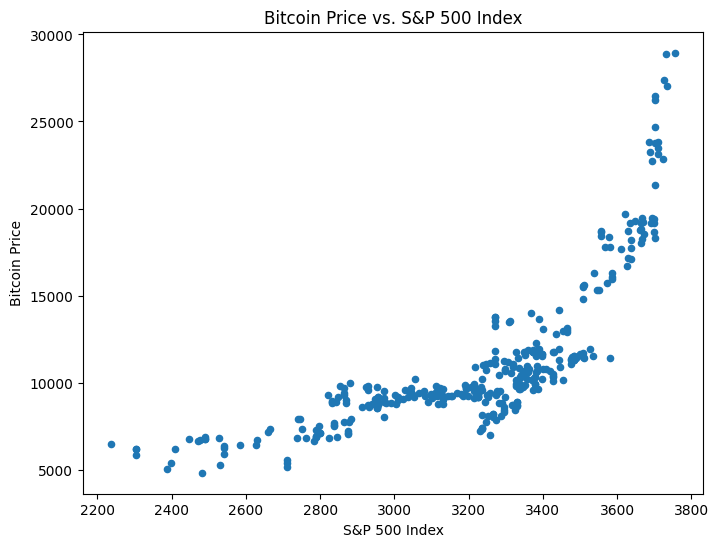

In [16]:
df.plot.scatter(x="S&P500", y="BITCOIN", figsize=(8,6))
plt.xlabel("S&P 500 Index")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price vs. S&P 500 Index")
plt.show()

### IX Scatter plot for Bitcoin price vs Brent Oil

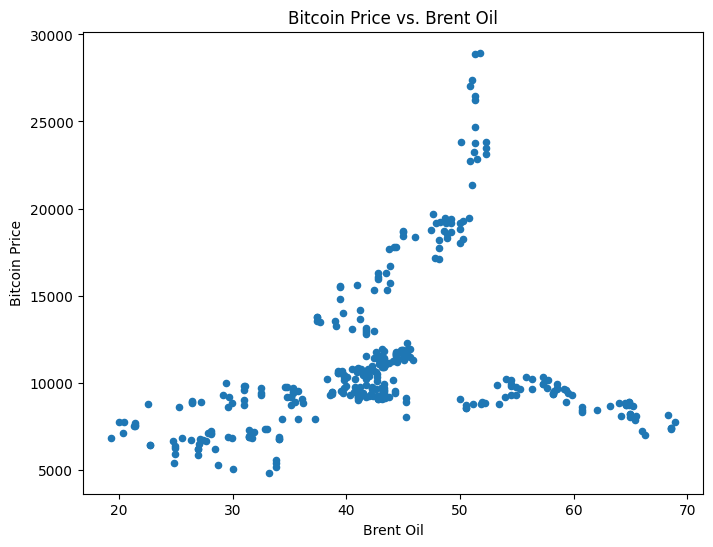

In [17]:
df.plot.scatter(x="Brent Oil", y="BITCOIN", figsize=(8,6))
plt.xlabel("Brent Oil")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price vs. Brent Oil")
plt.show()

### X Scatter plot for Bitcoin price vs Gold

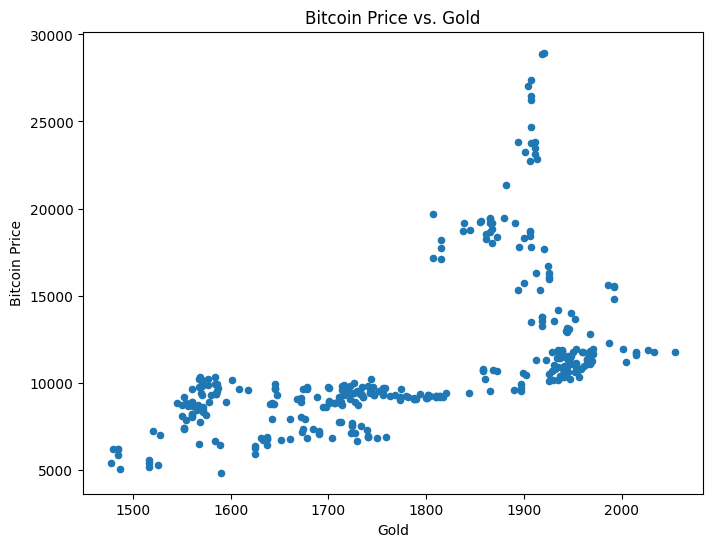

In [18]:
df.plot.scatter(x="Gold", y="BITCOIN", figsize=(8,6))
plt.xlabel("Gold")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price vs. Gold")
plt.show()

# BTC rate change over the years (2017-2021)

### 2017-2018

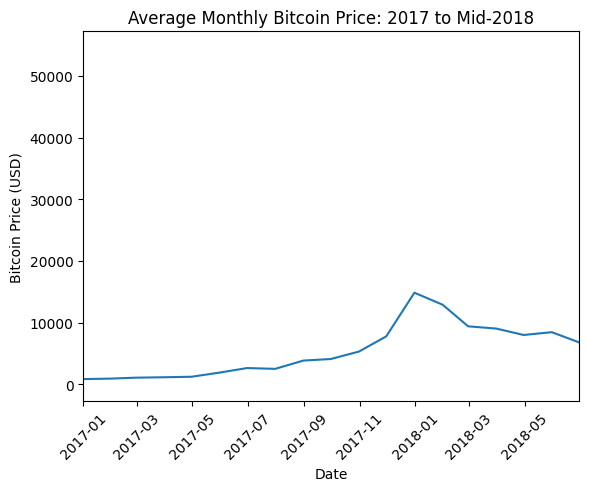

In [39]:
dff_monthly = dff.groupby(pd.Grouper(key='Timestamp', freq='M')).mean()
plt.plot(dff_monthly.index, dff_monthly['Weighted_Price'])
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Average Monthly Bitcoin Price: 2017 to Mid-2018')
plt.xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2018-06-30'))
plt.xticks(rotation=45)
plt.show()

As we can see from the graph, Bitcoin experienced a significant increase in value during the from 2017 to 2018, followed by a sharp decline in the second half of the year. There were several factors that contributed to this rise and subsequent fall like increased demand, announced plans to regulate cryptocurrencies, the popularity of initial coin offerings. 
Chinese government's crackdown on cryptocurrency trading and Initial Coin Offerings (ICOs), the introduction of Bitcoin futures trading on the Chicago Mercantile Exchange (CME) in December 2017

### 2018-2019

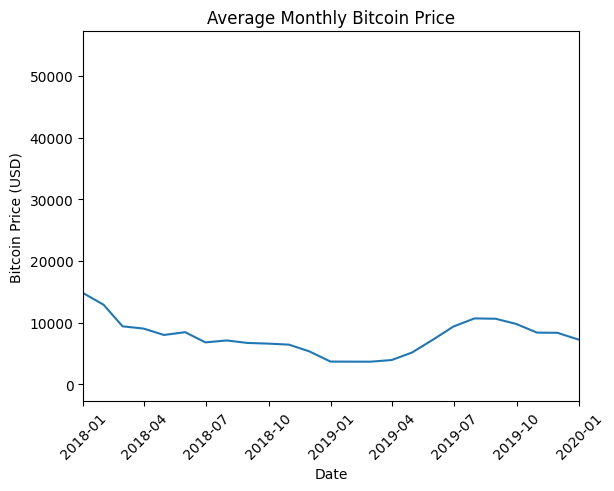

In [38]:
dff_monthly = dff.groupby(pd.Grouper(key='Timestamp', freq='M')).mean()
plt.plot(dff_monthly.index, dff_monthly['Weighted_Price'])
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Average Monthly Bitcoin Price')
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2020-01-01'))
plt.xticks(rotation=45)
plt.show()

Bitcoin experienced a significant price decline in 2018, falling from its all-time high of nearly 20,000 dollars in December 2017 to below 4,000 dollars by the end of the year. Throughout 2019, the price gradually recovered, reaching around 10,000 dollars by the end of the year.

Escalating trade war between the US and China, regulatory crackdowns in countries like China and India, and increased interest and adoption by institutional investors. Additionally, the market was impacted by news of major hacks and security breaches at cryptocurrency exchanges.

### 2019-2021

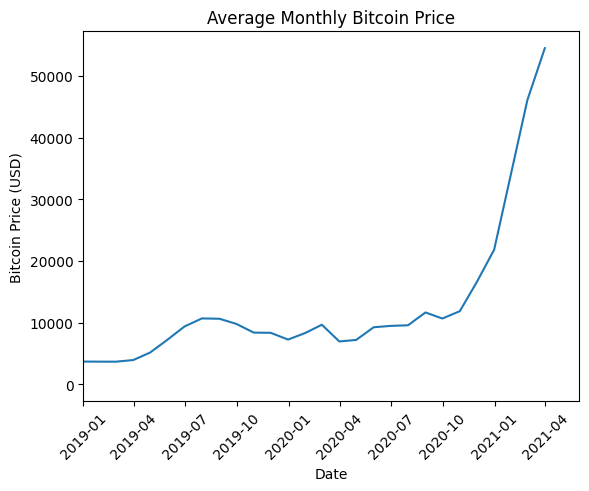

In [37]:
dff['Timestamp'] = pd.to_datetime(dff['Timestamp'], unit='s')
dff_monthly = dff.groupby(pd.Grouper(key='Timestamp', freq='M')).mean()
plt.plot(dff_monthly.index, dff_monthly['Weighted_Price'])
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.title('Average Monthly Bitcoin Price')
plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2021-05-31'))
plt.xticks(rotation=45)
plt.show()

The COVID-19 pandemic had a significant impact on the Bitcoin market, causing a sharp drop in price in March 2020. However, the market quickly recovered and saw a significant increase in demand and price, likely due to the global economic uncertainty caused by the pandemic.

US-China trade war, Brexit uncertainty, and the COVID-19 pandemic.Several central banks around the world, including the US Federal Reserve, implemented monetary policies such as quantitative easing, which also contributed to increased demand for Bitcoin as a store of value.

# Predicting the Bitcoin Rate on Pandemic Period 

In [25]:
# select data for the COVID-19 pandemic period (January 2020 - March 2022)
start_date = "2020-01-01"
end_date = "2022-03-31"
df_covid = df.loc[start_date:end_date]

In [26]:
# prepare the data for machine learning
X = df_covid[["Gold", "Brent Oil", "S&P500"]] # independent variables
y = df_covid["BITCOIN"] # dependent variable

In [27]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# make predictions on the testing set
y_pred = model.predict(X_test)

In [30]:
# evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

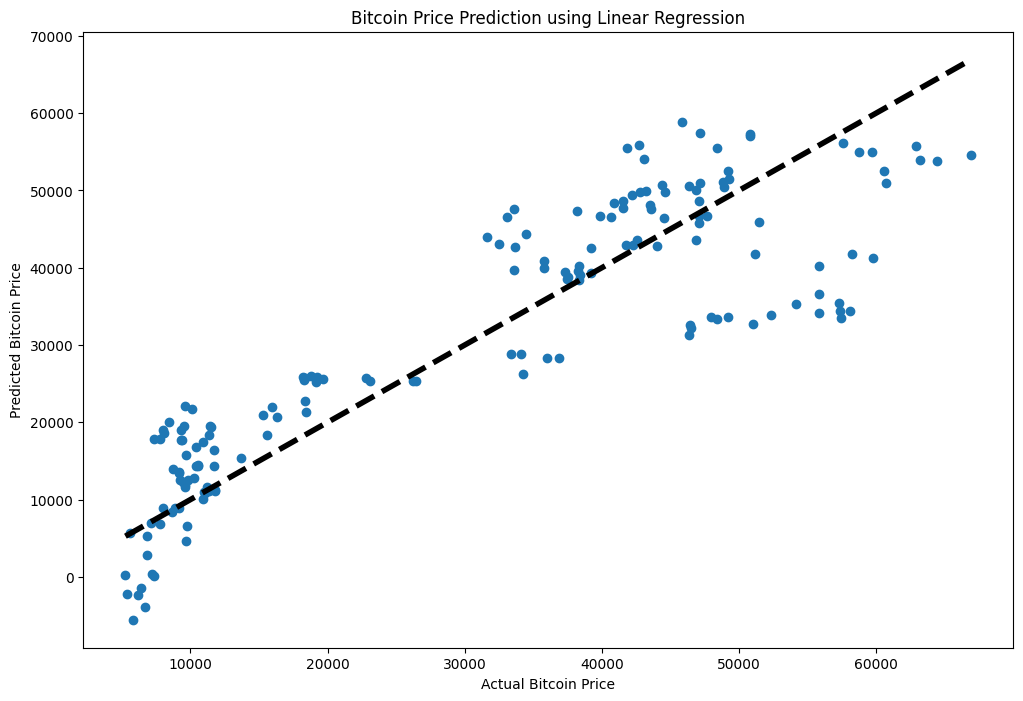

In [31]:
# plot the predicted vs. actual Bitcoin prices
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
ax.set_xlabel("Actual Bitcoin Price")
ax.set_ylabel("Predicted Bitcoin Price")
ax.set_title("Bitcoin Price Prediction using Linear Regression")
plt.show()

We have used linear regression to predict Bitcoin prices based on the gold price, Brent Oil price, and S&P 500 index. We split the data into training and testing sets, train the model on the training set, and then evaluate its performance using the root mean squared error (RMSE) on the testing set.

The plot shows the predicted Bitcoin prices vs. the actual Bitcoin prices, with the black dotted line representing a perfect prediction. The closer the scatter plot points are to the black line, the better the model's predictions are.

# Granger Causality Test on BTC, Gold, Oil, and S&P500

### BTC and Gold

In [5]:
data = pd.read_csv('BTC.csv', index_col='Date', parse_dates=True)

# Perform the Granger causality test for Bitcoin and Gold
test_result = grangercausalitytests(data[['BITCOIN', 'Gold']], maxlag=3, verbose=False)

# Print the results
for lag in test_result.keys():print(f'Lag {lag}: F-statistic = {test_result[lag][0]["params_ftest"][0]:.2f}, p-value = {test_result[lag][0]["params_ftest"][1]:.2f}')
    

Lag 1: F-statistic = 1.10, p-value = 0.29
Lag 2: F-statistic = 0.52, p-value = 0.59
Lag 3: F-statistic = 0.43, p-value = 0.73


Based on the output you provided, the Granger causality test results suggest that there is no evidence of Granger causality between Bitcoin and Gold at lags 1, 2, and 3.

At lag 1, the F-statistic is 1.10 and the p-value is 0.29. Since the p-value is greater than 0.05, we fail to reject the null hypothesis that the potential cause variable (Gold) has no effect on the effect variable (Bitcoin) at lag 1.

At lag 2, the F-statistic is 0.52 and the p-value is 0.59. Again, the p-value is greater than 0.05, so we fail to reject the null hypothesis that Gold has no effect on Bitcoin at lag 2.

At lag 3, the F-statistic is 0.43 and the p-value is 0.73. Once again, the p-value is greater than 0.05, so we fail to reject the null hypothesis that Gold has no effect on Bitcoin at lag 3.

Overall, these results suggest that changes in Gold prices are not useful for predicting changes in Bitcoin rates at lags 1, 2, and 3. However, it's worth noting that this analysis only considers a limited number of lags and there may be other factors that influence the relationship between Bitcoin and Gold. Further analysis and consideration of other potential factors could be useful for gaining a more complete understanding of their relationship.

### BTC and Brent Oil 

In [6]:
data = pd.read_csv('BTC.csv', index_col='Date', parse_dates=True)

# Perform the Granger causality test for Bitcoin and Oil
test_result = grangercausalitytests(data[['BITCOIN', 'Brent Oil']], maxlag=3, verbose=False)

# Print the results
for lag in test_result.keys():
    print(f'Lag {lag}: F-statistic = {test_result[lag][0]["params_ftest"][0]:.2f}, p-value = {test_result[lag][0]["params_ftest"][1]:.2f}')

Lag 1: F-statistic = 3.44, p-value = 0.06
Lag 2: F-statistic = 2.39, p-value = 0.09
Lag 3: F-statistic = 1.61, p-value = 0.18


Based on the output you provided, the Granger causality test results suggest that there may be some evidence of Granger causality between Bitcoin and Oil at lags 1 and 2, but not at lag 3.

At lag 1, the F-statistic is 3.44 and the p-value is 0.06. Since the p-value is close to 0.05, we may have weak evidence to reject the null hypothesis that the potential cause variable (Oil) has no effect on the effect variable (Bitcoin) at lag 1. However, this result is inconclusive and may require further investigation.

At lag 2, the F-statistic is 2.39 and the p-value is 0.09. Similar to lag 1, the p-value is close to 0.05, which suggests weak evidence of Granger causality between Oil and Bitcoin at lag 2. Further analysis and investigation may be necessary to confirm this relationship.

At lag 3, the F-statistic is 1.61 and the p-value is 0.18. Since the p-value is greater than 0.05, we fail to reject the null hypothesis that Oil has no effect on Bitcoin at lag 3.

Overall, these results suggest that changes in Oil prices may be useful for predicting changes in Bitcoin rates at lags 1 and 2, but not at lag 3. However, it's important to note that this analysis only considers a limited number of lags and there may be other factors that influence the relationship between Bitcoin and Oil. Further analysis and consideration of other potential factors could be useful for gaining a more complete understanding of their relationship.

### BTC and S&P500

In [7]:
data = pd.read_csv('BTC.csv', index_col='Date', parse_dates=True)

# Perform the Granger causality test for Bitcoin and S&P500
test_result = grangercausalitytests(data[['BITCOIN', 'S&P500']], maxlag=3, verbose=False)

# Print the results
for lag in test_result.keys():
    print(f'Lag {lag}: F-statistic = {test_result[lag][0]["params_ftest"][0]:.2f}, p-value = {test_result[lag][0]["params_ftest"][1]:.2f}')

Lag 1: F-statistic = 3.62, p-value = 0.06
Lag 2: F-statistic = 2.08, p-value = 0.13
Lag 3: F-statistic = 1.53, p-value = 0.20


Based on the output you provided, the Granger causality test results suggest that there may be some weak evidence of Granger causality between Bitcoin and the S&P 500 index at lag 1, but not at lags 2 and 3.

At lag 1, the F-statistic is 3.62 and the p-value is 0.06. Since the p-value is close to 0.05, we may have weak evidence to reject the null hypothesis that the potential cause variable (S&P 500) has no effect on the effect variable (Bitcoin) at lag 1. However, this result is inconclusive and may require further investigation.

At lag 2, the F-statistic is 2.08 and the p-value is 0.13. Since the p-value is greater than 0.05, we fail to reject the null hypothesis that S&P 500 has no effect on Bitcoin at lag 2.

At lag 3, the F-statistic is 1.53 and the p-value is 0.20. Once again, the p-value is greater than 0.05, so we fail to reject the null hypothesis that S&P 500 has no effect on Bitcoin at lag 3.

Overall, these results suggest that changes in the S&P 500 index may have a weak influence on predicting changes in Bitcoin rates at lag 1, but not at lags 2 and 3. However, it's important to note that this analysis only considers a limited number of lags and there may be other factors that influence the relationship between Bitcoin and the S&P 500 index. Further analysis and consideration of other potential factors could be useful for gaining a more complete understanding of their relationship.

/Users/xachzak/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


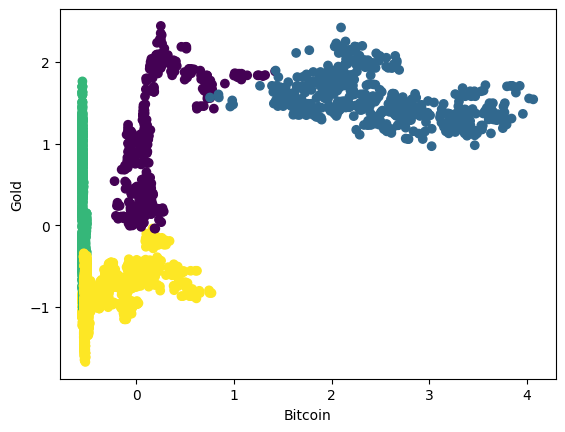

In [14]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv('BTC.csv')

# Select the columns to use for clustering
X = data[['BITCOIN', 'Gold', 'Brent Oil', 'S&P500']]

# Standardize the data
X_scaled = (X - X.mean()) / X.std()

# Perform k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_scaled)

# Add the cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_

# Plot the clusters using the first two principal components
plt.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:,1], c=kmeans.labels_)
plt.xlabel('Bitcoin')
plt.ylabel('Gold')
plt.show()